# Image Classification with Convolutional Neural Networks

## Step 1: Load the data

In [23]:
import os
from glob import glob

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


In [24]:
basepath = '../data/01_raw/shipsnet/shipsnet/'

no_ship = glob(os.path.join(basepath, '0_*'))
ship = glob(os.path.join(basepath, '1_*'))

print(f'Number of ships: {len(ship)}')
print(f'Number of no ships: {len(no_ship)}')

Number of ships: 1000
Number of no ships: 3000


In [25]:
images = []
labels = []
for file in ship:
    image = Image.open(file)
    images.append(image)
    labels.append(1)

for file in no_ship:
    image = Image.open(file)
    images.append(image)
    labels.append(0)

images = np.array(images, dtype=np.int64)
labels = np.array(labels, dtype=np.int64)

## Step 2: Split the data into training and testing sets

In [26]:
from keras.utils import to_categorical

In [27]:
# Split the data into train (70%), validation (20%) and test (10%) datasets

from sklearn.model_selection import train_test_split

X_train, X_test_val, y_train, y_test_val = train_test_split(images, labels, test_size=0.3, random_state=42, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=0.33, random_state=42, shuffle=True)

In [28]:
y_train = to_categorical(y_train, 2)
y_val = to_categorical(y_val, 2)
y_test = to_categorical(y_test, 2)

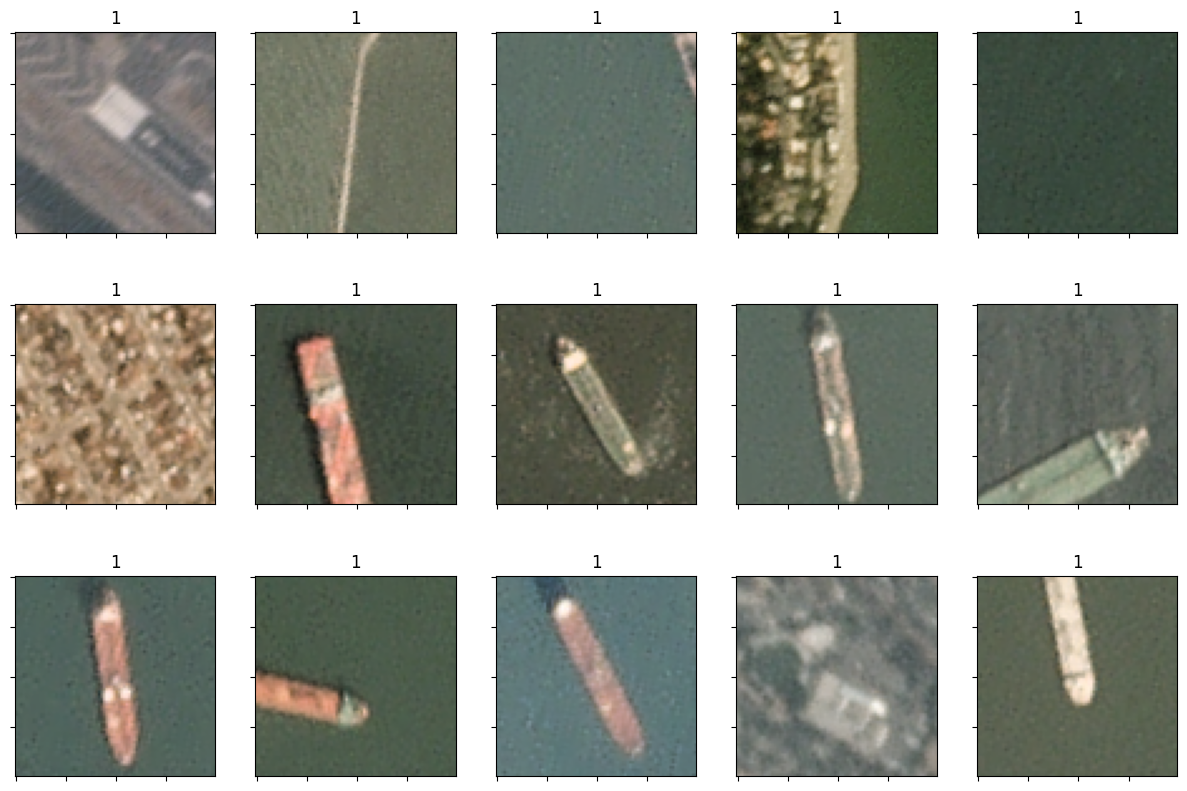

In [29]:
# Plot some sample images
import random

n_rows = 3
n_cols = 5

plt.figure(figsize=(15, 10))
for i in range(n_rows*n_cols):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    index = random.randint(0, len(X_train) - 1)
    plt.imshow(X_train[index])
    plt.title(labels[np.argmax(y_train[index])])

## Step 3: Define the CNN

In [30]:
from keras.layers import (
    BatchNormalization,
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    LeakyReLU,
    MaxPooling2D,
)
from keras.models import Sequential

In [31]:
# Define the Neural Network
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='linear', input_shape = (80, 80, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(256, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Dense(64, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Dense(2, activation='softmax'))

model.summary()

/Users/ankita_katiyar/anaconda3/envs/image/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/ankita_katiyar/anaconda3/envs/image/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 80, 80, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 80, 80, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 40, 40, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 40, 40, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 40, 40, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 40, 40, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 40, 40, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 20, 20, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 10, 10, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 5, 5, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,638,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 256)            │             

 Total params: 2,046,850 (7.81 MB)

 Trainable params: 2,045,250 (7.80 MB)

 Non-trainable params: 1,600 (6.25 KB)

## Step 4: Train the model

In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint


In [33]:
# Compile and fit the NN
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpoint = ModelCheckpoint("ship_detection.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
history = model.fit(X_train, y_train, batch_size=16, epochs=10, verbose=1, validation_data=(X_val, y_val), callbacks=[checkpoint])

Epoch 1/10
174/175 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7900 - loss: 0.4987
Epoch 1: val_accuracy improved from -inf to 0.91791, saving model to ship_detection.keras
175/175 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - accuracy: 0.7907 - loss: 0.4973 - val_accuracy: 0.9179 - val_loss: 0.2696
Epoch 2/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9170 - loss: 0.2308
Epoch 2: val_accuracy did not improve from 0.91791
175/175 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.9171 - loss: 0.2306 - val_accuracy: 0.8918 - val_loss: 0.2820
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9568 - loss: 0.1458
Epoch 3: val_accuracy improved from 0.91791 to 0.93284, saving model to ship_detection.keras
175/175 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.9568 - loss: 0.1458 - val_accuracy: 0.9328 - val_loss: 0.1529
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9587 - loss: 0.1159
Epoch 4: val_accuracy did not improve from 0.93284
175/175 ━━

## Step 5: Evaluate the model

In [34]:
# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=1)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9812 - loss: 0.0354
Test Loss: 0.03448645398020744
Test Accuracy: 0.9823232293128967


## Step 6: Show accuracy and loss plots 

In [36]:
import plotly.graph_objects as go

# Extract data from history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = list(range(len(accuracy)))

# Create a figure for Training and Validation accuracy
fig_accuracy = go.Figure()

# Add Training accuracy trace
fig_accuracy.add_trace(go.Scatter(x=epochs, y=accuracy, mode='lines', name='Training accuracy', line=dict(color='blue')))

# Add Validation accuracy trace
fig_accuracy.add_trace(go.Scatter(x=epochs, y=val_accuracy, mode='lines', name='Validation accuracy', line=dict(color='red')))

# Set title and labels
fig_accuracy.update_layout(
    title='Training and Validation Accuracy',
    xaxis_title='Epochs',
    yaxis_title='Accuracy'
)

# Create a figure for Training and Validation loss
fig_loss = go.Figure()

# Add Training loss trace
fig_loss.add_trace(go.Scatter(x=epochs, y=loss, mode='lines', name='Training loss', line=dict(color='blue')))

# Add Validation loss trace
fig_loss.add_trace(go.Scatter(x=epochs, y=val_loss, mode='lines', name='Validation loss', line=dict(color='red')))

# Set title and labels
fig_loss.update_layout(
    title='Training and Validation Loss',
    xaxis_title='Epochs',
    yaxis_title='Loss'
)

fig_accuracy.show()
fig_loss.show() 

